In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Trends for Data Analyst Jobs
1. For this we're going to only be looking at data analyst jobs. So we'll create a copy of our original DataFrame that filters only for Data Analyst roles.
2. Extract the month from the job_posted_date.
3. Explode the job_skills column.
4. Let's pivot the data to get the count (or size) of each skill for each month.
5. We need to sort the skills to be in order of count to make it easier to plot the top X.
6. (Optional) I like to have my months as names, not numbers, so let's change this.
7. Let's graph the top 5 skills by count.



In [24]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()


In [25]:
df_DA['job_posted_month'] = df_DA['job_posted_date'].dt.month


In [26]:
df_DA_exploded = df_DA.explode('job_skills')


In [27]:
df_DA_pivot = df_DA_exploded.pivot_table(index = 'job_posted_month', columns = 'job_skills', aggfunc = 'size', fill_value= 0)


In [28]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()


In [29]:
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending = False).index]


In [30]:
df_DA_pivot = df_DA_pivot.drop('Total')


In [31]:
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))

In [32]:
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')


<Axes: xlabel='job_posted_month'>

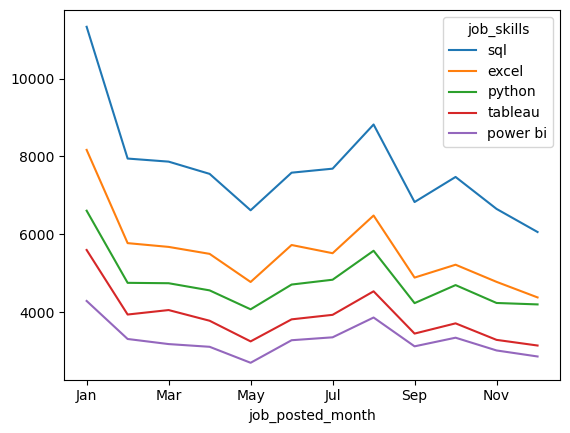

In [34]:
df_DA_pivot.iloc[:, :5].plot(kind = 'line')